# 一、蒙特·卡罗方法
蒙特·卡罗方法（Monte Carlo method），也称***统计模拟方法***，是二十世纪四十年代中期由于科学技术的发展和电子计算机的发明，而被提出的一种以***概率统计***理论为指导的一类非常重要的***数值计算方法***。是指使用随机数（或更常见的伪随机数）来解决很多计算问题的方法。与它对应的是***确定性算法***。蒙特·卡罗方法在金融工程学，宏观经济学，计算物理学（如粒子输运计算、量子热力学计算、空气动力学计算）等领域应用广泛。

简单来说，就是用大量随机试验（或伪随机实验）来逼近概率统计的一种方法；采样越多，越逼近最优解。

当所求解问题是某种随机事件出现的概率，或者是某个随机变量的期望值时，通过某种“实验”的方法，以这种事件出现的频率估计这一随机事件的概率，或者得到这个随机变量的某些数字特征，并将其作为问题的解。


# 二、举例说明
下面通过几个例子来描述直观的一下。

## 1、π的计算
第一个例子是，如何用蒙特卡罗方法计算圆周率π。
正方形内部有一个相切的圆，它们的面积之比是π/4。

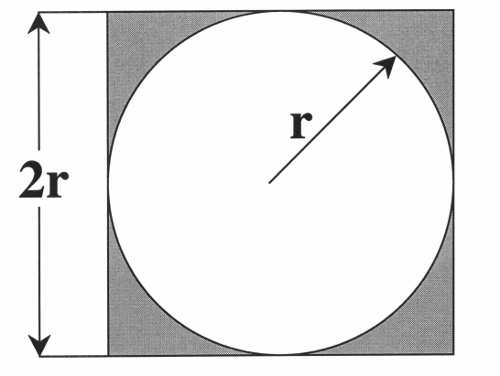

In [1]:
from IPython.display import Image
Image(filename="images/monte-carlo-1.jpg")

现在，在这个正方形内部，随机产生10000个点（即10000个坐标对 (x, y)），计算它们与中心点的距离，从而判断是否落在圆的内部。
如果这些点均匀分布，那么圆内的点应该占到所有点的 π/4，因此将这个比值乘以4，就是π的值。

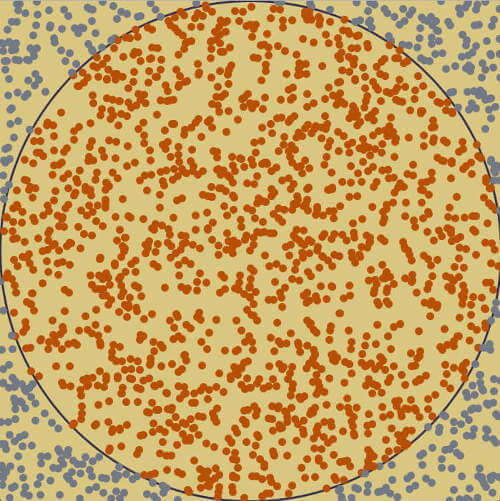

In [2]:
Image(filename="images/monte-carlo-2.jpg")

In [3]:
import random
count = 0
for i in range(100000):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    if x*x + y*y <= 1:
        count += 1
print(4*count/100000)

3.1446


## 2、积分的计算
上面的方法加以推广，就可以计算任意一个积分的值。

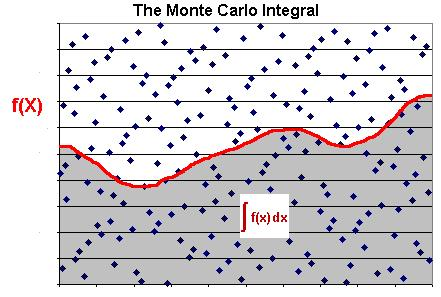

In [4]:
Image(filename="images/monte-carlo-3.jpg")

比如，计算函数 y = x2 在 [0, 1] 区间的积分，就是求出下图红色部分的面积。
这个函数在 (1,1) 点的取值为1，所以整个红色区域在一个面积为1的正方形里面。在该正方形内部，产生大量随机点，可以计算出有多少点落在红色区域（判断条件 y < x2）。这个比重就是所要求的积分值。

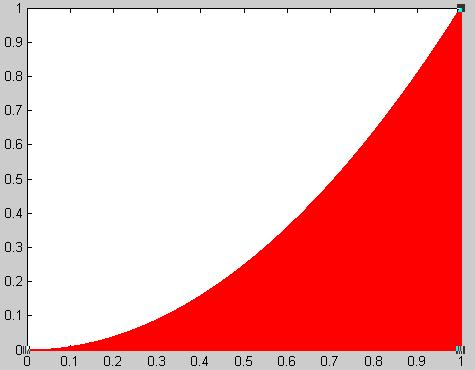

In [5]:
Image(filename="images/monte-carlo-4.jpg")

In [6]:
count = 0
for _ in range(100000):
    x, y = random.uniform(0, 1), random.uniform(0, 1)
    if y < x*x:
        count += 1
print(count/100000)

0.33181


## 3、观察一下
看看前面两个例子，可以看到明显的***代码重复***。重复的***过程***，每种计算的模式都是一样的。因此可以将这个过程抽象出来。

In [7]:
def monteCarlo(num, op):
    count = 0
    for i in range(num):
        if op() == True:
            count += 1
    return count / num

def monteCarlo2(num, op):
    return sum([op() for _ in range(num)]) / num

计算π的例子可以改写成

In [8]:
def calc_pi(num):
    def func():
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        return x*x + y*y <= 1
    return 4 * monteCarlo2(num, func)
print(calc_pi(100000))

3.14332


计算积分的例子可以改写成(其实具体要计算积分的目标函数应该作为参数带进来，获取其他方式)

In [9]:
def calc_integral(num):
    def func():
        x, y = random.uniform(0, 1), random.uniform(0, 1)
        return y < x*x
    return monteCarlo2(num, func)
print(calc_integral(100000))

0.33267


## 4、证券市场
证券市场有时交易活跃，有时交易冷清。下面是你对市场的预测。
- 如果交易冷清，你会以平均价11元，卖出5万股。
- 如果交易活跃，你会以平均价8元，卖出10万股。
- 如果交易温和，你会以平均价10元，卖出7.5万股。
已知你的成本在每股5.5元到7.5元之间，平均是6.5元。请问接下来的交易，你的净利润会是多少？

取若干个随机样本，每个样本有两个数值：一个是证券的成本（5.5元到7.5元之间的均匀分布），另一个是当前市场状态（冷清、活跃、温和，各有三分之一可能）。可以模拟计算其净利润。

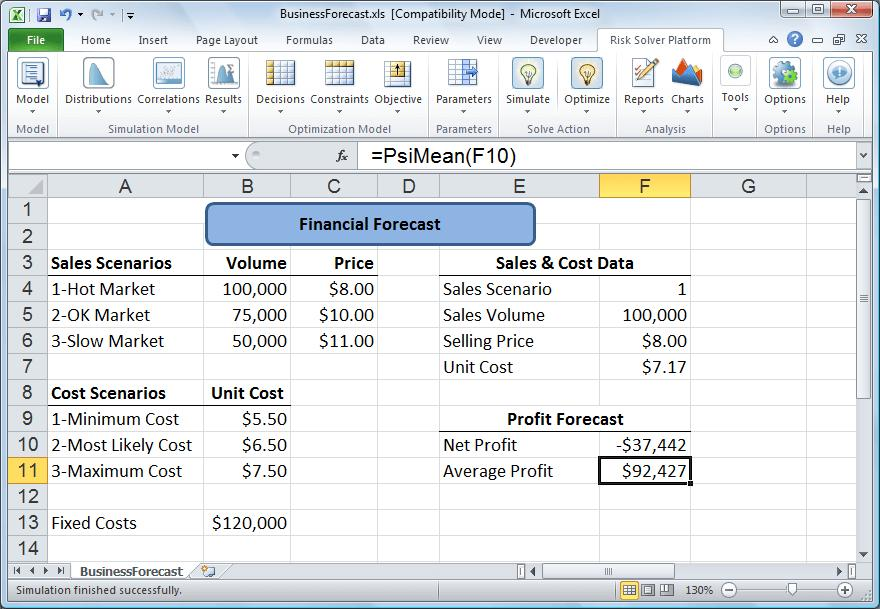

In [10]:
Image(filename="images/monte-carlo-5.jpg")

In [11]:
def calc_profit(num):
    def func():
        cost = random.uniform(5.5, 7.5)
        price, volume = {
            "hot":(8.0, 100000),
            "ok": (10.0, 75000),
            "slow":(11.0,50000)
        }[random.choice(["hot", "ok", "slow"])]
        return (price - cost)*volume
    return monteCarlo2(num, func)
print(calc_profit(10000))

212077.34694247975


## 5、产品厚度
某产品由八个零件堆叠组成。也就是说，这八个零件的厚度总和，等于该产品的厚度。
已知该产品的厚度，必须控制在27mm以内，但是每个零件有一定的概率，厚度会超出误差。请问有多大的概率，产品的厚度会超出27mm？

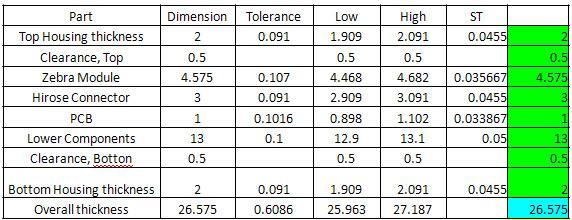

In [12]:
Image(filename="images/monte-carlo-6.jpg")

In [13]:
def calc_thickness(num):
    def func():
        topHousing = random.uniform(1.909, 2.091)
        topClearance = 0.5
        zebra = random.uniform(4.468, 4.682)
        hirose = random.uniform(2.909, 3.091)
        pcb = random.uniform(0.898, 1.102)
        lowerComp = random.uniform(12.9, 13.1)
        bottonClearance = 0.5
        bottonHousing = random.uniform(1.909, 2.091)
        return (topHousing + topClearance + zebra + hirose + pcb + lowerComp + bottonClearance + bottonHousing) > 27
    return monteCarlo2(num, func)
print(calc_thickness(100000))

0.00037


# 三、随机算法
随机算法可以粗略的分为两类：Las Vegas算法（拉斯维加斯算法）和蒙特卡罗算法。 

既然是随机算法，在采样不全时，通常不能保证找到最优解，只能说是尽量找。

- 蒙特卡罗算法：采样越多，越接近最优解(强调每一个iteration都在进步，提高的过程)。总是会返回一个伴随着随机量错误的答案，花费更多的计算资源（通常包括内存和运行时间）可以减少这种随机量的错误。在任意的固定的计算资源下，蒙特卡罗算法可以得到一个近似解。
- 拉斯维加斯算法：采样越多，越有可能找到最优解(强调直接想要最优解)。或者精确地返回一个正确答案，或者发布一个失败报告。

举个例子，假如筐里有100个苹果，每次闭眼拿1个，挑出最大的。于是随机拿1个，再随机拿1个跟它比，留下大的，再随机拿1个……，留下的苹果都至少不比上次的小。拿的次数越多，挑出的苹果就越大，但除非拿100次，否则无法肯定挑出了最大的。这个挑苹果的算法，就属于蒙特卡罗算法——尽量找好的，但不保证是最好的。

而拉斯维加斯算法，则是另一种情况。假如有一把锁，给100把钥匙，只有1把是对的。每次随机拿1把钥匙去试，打不开就再换1把。试的次数越多，打开（最优解）的机会就越大，但在打开之前，那些错的钥匙都是没有用的。这个试钥匙的算法，就是拉斯维加斯的——尽量找最好的，但不保证能找到。

这两类随机算法之间的选择，往往受到问题的局限。
- 如果问题要求在有限采样内，必须给出一个解，但不要求是最优解，那就要用蒙特卡罗算法。
- 如果问题要求必须给出最优解，但对采样没有限制，那就要用拉斯维加斯算法。

对于机器学习中的许多问题来说，我们很难得到精确的答案。这类问题很难用精确的确定性的算法如拉斯维加斯算法解决。取而代之的是确定性的近似算法或蒙特卡罗方法。

例如对于机器围棋程序而言，因为每一步棋的运算时间、堆栈空间都是有限的，而且不要求最优解，所以涉及的随机算法，肯定是蒙特卡罗式的。

> 拉斯维加斯算法应用：
  - pollard_rho算法，用于因数分解
  - Tonelli算法，用于求解模平方根（设p为奇素数，1<= x <=p-1, 如果存在一个整数y，1<= y <= p-1, 使得 x ≡ y*y (mod p) 则称y是x的模p平方根。）
  - n皇后问题
  - 。。。。。。

# 四、蒙特卡洛树搜索（MCTS）
蒙特卡洛树搜索，是将蒙特卡洛和树搜索算法结合在一起，提出的一种随机化的树搜索算法。

传统的树搜索，如Minimax tree和Alpha-beta剪枝等各种技巧，归根到底还是暴力搜索。将游戏中所有的可能性表示成一棵树，树的第N层就代表着游戏中的第N步。树的node数是随着树的深度成指数增长的。其在象棋、黑白棋等游戏中获得了成功，最主要原因是搜索空间比较小。

当搜索空间很大的时候（比如围棋），传统的树搜索算法是无能为力的（计算资源受限，包括物理资源和时间）。

MCTS解决了这个问题。MCTS与普通MC一样需要采样，这里的采样，是指一次从根节点到游戏结束的路径访问。只要采样次数够多，我们可以近似知道走那条路径比较好。

与普通的蒙特卡罗方法不同的是，由于树型结构解空间太大，不可能完全随机去采样，有额外一些细节问题要解决（具体解决方案，参考原版论文《Mastering the game of Go with deep neural networks and tree search》)：
- 分支节点怎么选（宽度优化）？不选比较有效的分支会浪费大量的无谓搜索。
- 评估节点是否一定要走到底得到游戏最终结果（深度优化）？

基本的MCTS有4个步骤Selection,Expansion,Simulation,Backpropagation。

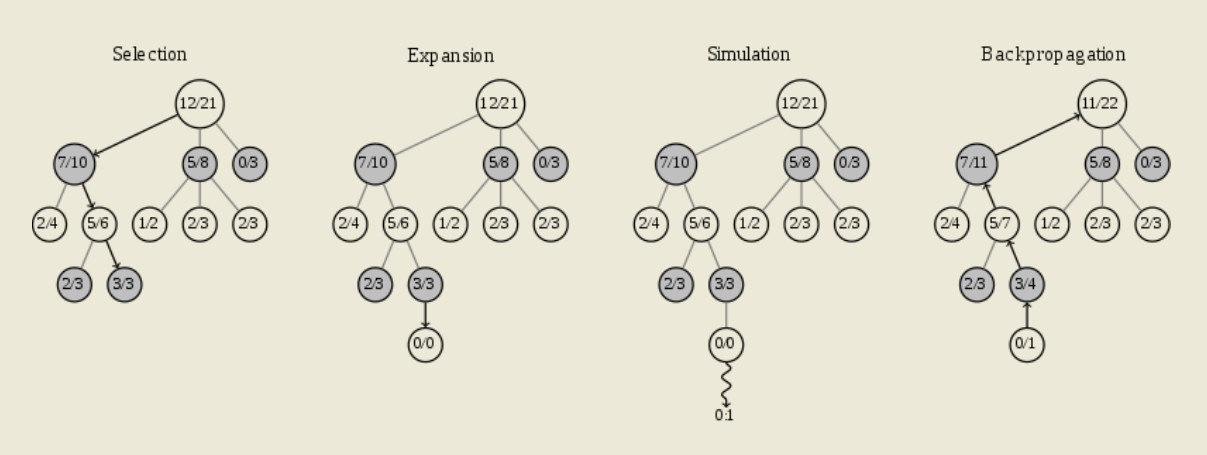

In [14]:
Image(filename="images/monte-carlo-7.jpg")

- 选择 Selection：从根节点 R 开始，递归选择最优的子节点，直到达到叶子节点 L。
- 扩展 Expansion：如果 L 不是一个终止节点（也就是，不会导致游戏终止）那么就创建一个或者更多的子节点，选择其中一个 C。
- 模拟 Simulation：从 C 开始运行一个模拟的输出，直到游戏结束(通常采用随机落子的方式)。
- 反向传播 Backpropagation：用模拟的结果输出更新当前行动序列。

之后，重新从第一步开始，不断地进行迭代。使得添加的子节点越来越多，则对于R所有的子节点的胜利率也越来越准。最后，选择胜利率最高的路径。

上图展示了如何更新节点的胜率，选择胜率大的分支进行搜索（7/10->5/6->3/3)，到了3/3叶子节点进行展开选择一个子节点，然后进行模拟，评估这个子节点的结果。然后把结果向上回溯到根节点。

每个节点并需包含两个重要的信息：一个是根据模拟结果估计的值和该节点已经被访问的次数。

# 五、参考资料
- http://www.ruanyifeng.com/blog/2015/07/monte-carlo-method.html 蒙特卡罗方法入门
- http://blog.csdn.net/daisylym/article/details/4548769 随机算法之拉斯维加斯算法及蒙特卡罗算法初步
- http://blog.csdn.net/maxichu/article/details/45459533 大数因数分解Pollard_rho 算法详解
- http://www.kuqin.com/shuoit/20160219/350769.html 蒙特卡洛树搜索 MCTS
- http://mp.weixin.qq.com/s/KrF6LoAUcJg_qPEEFBqgh AlphaGo背后的大师：DeepMind --- 推荐
- http://blog.csdn.net/natsu1211/article/details/50986810 那么蒙特卡洛树搜索(Monte Calro Tree Search, MCTS)究竟是啥
- http://tech.sina.com.cn/d/2014-07-28/10299520957.shtml 电脑是如何下棋的：关乎智力的高级挑战
- http://jeffbradberry.com/posts/2015/09/intro-to-monte-carlo-tree-search/ Introduction to Monte Carlo Tree Search 并用python实现
- http://blog.csdn.net/dinosoft/article/details/50893291 蒙特卡罗树搜索+深度学习 -- AlphaGo原版论文阅读笔记


- http://www.cnblogs.com/yd1227/archive/2011/03/18/1988015.html Python中的random模块
- http://www.cnblogs.com/giserliu/p/4997144.html ipython notebook使用教程
- https://segmentfault.com/a/1190000005104723 Python--matplotlib绘图可视化知识点整理